# Accessing Files
Since Google Colab uses a cloud service, it does not have access to your cloud driver. The program below lets you access your drive.


In [1]:
from google.colab import drive
drive.mount("gdrive") # Access drive under '/content/gdrive/'

Mounted at gdrive


# Converting Video File to Images
In Google Colab, live capturing from cameras are disabled, so we will just proccess the program using images instead.
First we need to use the function 'cv.VideoCapture()' with the parameters being the path to the file. Now we will take a frame of that video using the function 'capture.read()' and save it to the directory (in this case it will be saved under "/content/")

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
# Open video capture
video = "/content/gdrive/MyDrive/Python ML tutorial/pythonYolo3Playlist/example.mp4"
capture = cv.VideoCapture(video)
isTrue, frame = capture.read()
count = 0
# Save frames
while isTrue:
  isTrue, frame = capture.read()
  if not isTrue:
    break
  # Saves to local path '/content/'
  cv.imwrite("frame%03d.jpg" %count, frame) # String format '%' is placeholder
  count += 1

# Import Our Class IDs
Next is to import the file that will be consisting of our weights, config, and names. The weight and config determine if a portion of the image is potentially an identified object. Since we are using YOLO, we will be using the coco set consisting of 80 common objects like 'person', 'cup', 'cell phone', etc. The weights themselves are indexed and do not have a name associated with that index, so we will be making that below.

We will first open the text file name 'coco.names' using 'with open() as f' with the first parameter being the file name and the second parameter being the read type. The variable classNames will store a list consisting of the names in the correct index.'f.read()' just reads the whole file as a string, then '.split' splits the string into a list separated by the newline.

In [3]:
# Text file of names
importClassNames = "/content/gdrive/MyDrive/Python ML tutorial/pythonYolo3Playlist/coco.names"
# List
classNames = []
# File to list
with open(importClassNames, "r") as f: 
    classNames = f.read().split("\n")

In [ ]:
print(classNames) #check the list

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', '']


## Implementing the Machine Learning Algorithm
Next, we will create the machine learning algorithm using the two files found on this website. We will be using the variable 'net' later.

In [4]:
import cv2 as cv
# File for the config
modelConfiguation = "/content/gdrive/MyDrive/Python ML tutorial/pythonYolo3Playlist/yolov3.cfg"
# File for the weights of the objects(this is already pretrained)
modelWeights = "/content/gdrive/MyDrive/Python ML tutorial/pythonYolo3Playlist/yolov3.weights"
# Creating the network of nodes to compare input and outputs
# Machine learning algorithm
net = cv.dnn.readNet(modelConfiguation, modelWeights)

# Converting 'frame' to be Used in the Algorithm
Right now the picture cannot be processed in the machine learning algorithm, So we will convert the frame into something called a 'blob'. Blob takes in a few parameters: image, scale factor, size, mean, swap RB, crop. We will then send the input of the blob into the network. The 'layerNames' variable gets all the variable names of our layers in the network. 

Next, we have to extract the output layers using the function 'network.getUnconnectedOutlayers()'. Note that we are just getting the index of the output, so we will use the index and refer it back to the 'layerNames'. Next, we will make a variable that forwards the outputNames to the network using the function 'net.forward'.

Now the network has a bunch of values including the bounding box, as well as its percentages, so the next part of the programs start filtering those results to be displayed later

Since the output does not use the index '0' and starts the index at 1, we will shift the index by '-1'.
Outputs will be the results we will need to display the results.

In [5]:
import numpy as np
def getOutputs(frame):
    blob = cv.dnn.blobFromImage(frame, 1/255, (widthheight, widthheight), [0, 0, 0], 1, crop = False)
    # network is where all the magic happens
    # it just tells gives you outputs for objects on the screen
    net.setInput(blob)
    layerNames = net.getLayerNames() #gets all names of the layer
    #print(layerNames)
    #print(net.getUnconnectedOutLayers()) #this gets the index of the output (does not use '0')
    outputNames = [layerNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    #print(outputNames)
    #send image to network, find output
    outputs = net.forward(outputNames) # output is a list containing 3 values, within the list 'numpy'
    #print(len(outputs))         # 3
    #print(type(outputs))        # list
    #print(type(outputs[0]))     # numpy.ndarray (matrix)
    #print(outputs[0].shape)      # (300, 85 )
    #print(outputs[1].shape)      # (1200, 85)
    #print(outputs[2].shape)      # (4800, 85)
    #print(outputs[0][0])
    # for each box number, center x, center y, width, height, confidence object present, rest probability of that class
    return outputs

In [ ]:
#Example to help with the above code and printing output
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
#widthheight = 320;
image = "/content/frame000.jpg"
frame = cv.imread(image)
frame = cv.resize(frame, None, fx = 0.5, fy = 0.5)
#network understands blob
outputs = getOutputs(frame)
#cv2_imshow(frame)

[6.0194306e-02 2.8077632e-02 2.6758474e-01 2.9601535e-01 9.9989521e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

# Creating What to be Displayed
Now that we have the results, we will now make an algorithm to display the highest probability of that object in the bounding box. First, note that the output consists of 85 values instead of 80 from our name list. The first 5 values are as followed: center x, center y, width, height, confidence object present. The rest of the 80 values are the probability of that object displayed. We will make a new variable 'scores' consisting of only the probability of those objects. We will then get the class ID of the max probability of that object. We will also get that probability value by finding the index of the scores. 

The next thing is to check if the probability of that object is higher than our threshold. If it is we will make a bounding box for it. To make a bounding box, we will need 4 variables: x and y coordinate, the width, and the height of the bounding box. The code below edits the center x and y coordinate to the respective coordinate.
The variable 'outputBox' removes uneccesary boxes, and this is controlled by the variable 'nmsThreshold'.We will finaly display the boxes to the window using 'cv.rectangle()', 'cv.putText()', 'cv.imshow()'.

In [ ]:
import numpy as np
def displayBox(outputs):
    height, width, channels = frame.shape  # get the values of the h, w, channel is not needed
    boundingBox = []   # creates a list of bounding boxes to be created
    classIDs = []      # gets the id of the list
    confidenceValues = []   # gets the confident value
    
    for output in outputs:
        for values in output:  # values contains values and predictables
            scores = values[5:] # only contains the values of the predictions
            classID = np.argmax(scores)  #gets the class ID with the highest score within the list
            confidence = scores[classID] #gets the confidence value
            if confidence > confidenceThreshold:  #checks if it passes the threshold
                w, h = int(values[2] * width), int(values[3] * height) # width and height of bounding box
                x, y = int(values[0] * width - w/2), int(values[1] * height - h/2)  # get the x y position
                boundingBox.append([x, y, w, h])  # add bounding box
                classIDs.append(classID) # add classids
                confidenceValues.append(float(confidence)) # add confidence value
    
    #removes inside boxes , based on nms threshold
    outputBox = cv.dnn.NMSBoxes(boundingBox, confidenceValues, confidenceThreshold, nmsThreshold)
            #gets a nested list    
    for i in outputBox:
        index = i[0]
        color = colors[classIDs[index]]
        x, y, w, h = boundingBox[index][:4]
        cv.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        #(image, point 1, point 2, color, thickness)
        label = str(classNames[classIDs[index]].capitalize()) + " " + str(int(confidenceValues[index] * 100)) + " %"
        cv.putText(frame, label,(x + 5,y + 16), font, 0.5, color, 2)
        #(image, text, position, font, size, color, thickness)

# Main Function
We will first list off all of our constants here. This is so that we can easily change it later. We will now get all the files using the path '/content/' followed by '*.*' to get all the files in that directory. We will sort them in order of the frame number and now display the file name and the picture with the algorithm for all the frames.

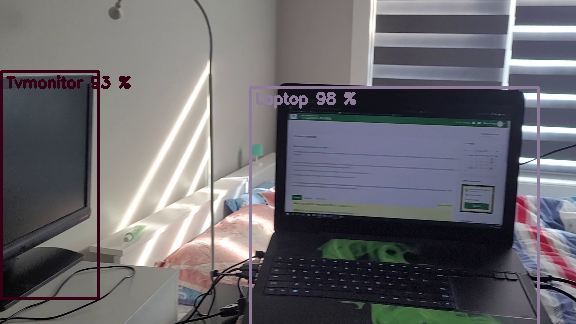

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import glob
import os

widthheight = 320             # used to evaluated the image at that pixel
confidenceThreshold = 0.5     # value that tells you the threshold of how the network sees as that object
nmsThreshold = 0.6            # value is used to decrease the number of bounding boxes displayed
font = cv.FONT_HERSHEY_SIMPLEX# font value for output name
colors = np.random.uniform(0, 255, size = (len(classNames),3)) # option for using different colors for every name
path = "/content/"
pathFile = path + "*.*"                                    # Gets the files of that folder
files = sorted(glob.glob(pathFile), key = os.path.getmtime)  # Access google drive
frameSize = 0.3              # resize frame(faster runtime)

for f in files:
  print(f.strip(path))  #displays the file name
  frame = cv.imread(f)  # takes in frame
  frame = cv.resize(frame, None, fx = frameSize, fy = frameSize)
  #network understands blob
  displayBox(getOutputs(frame))
  #frame = cv.resize(frame, None, fx = 1.6, fy = 1.6)
  cv2_imshow(frame)

If you want to only input a single image the algorithm below will do that.

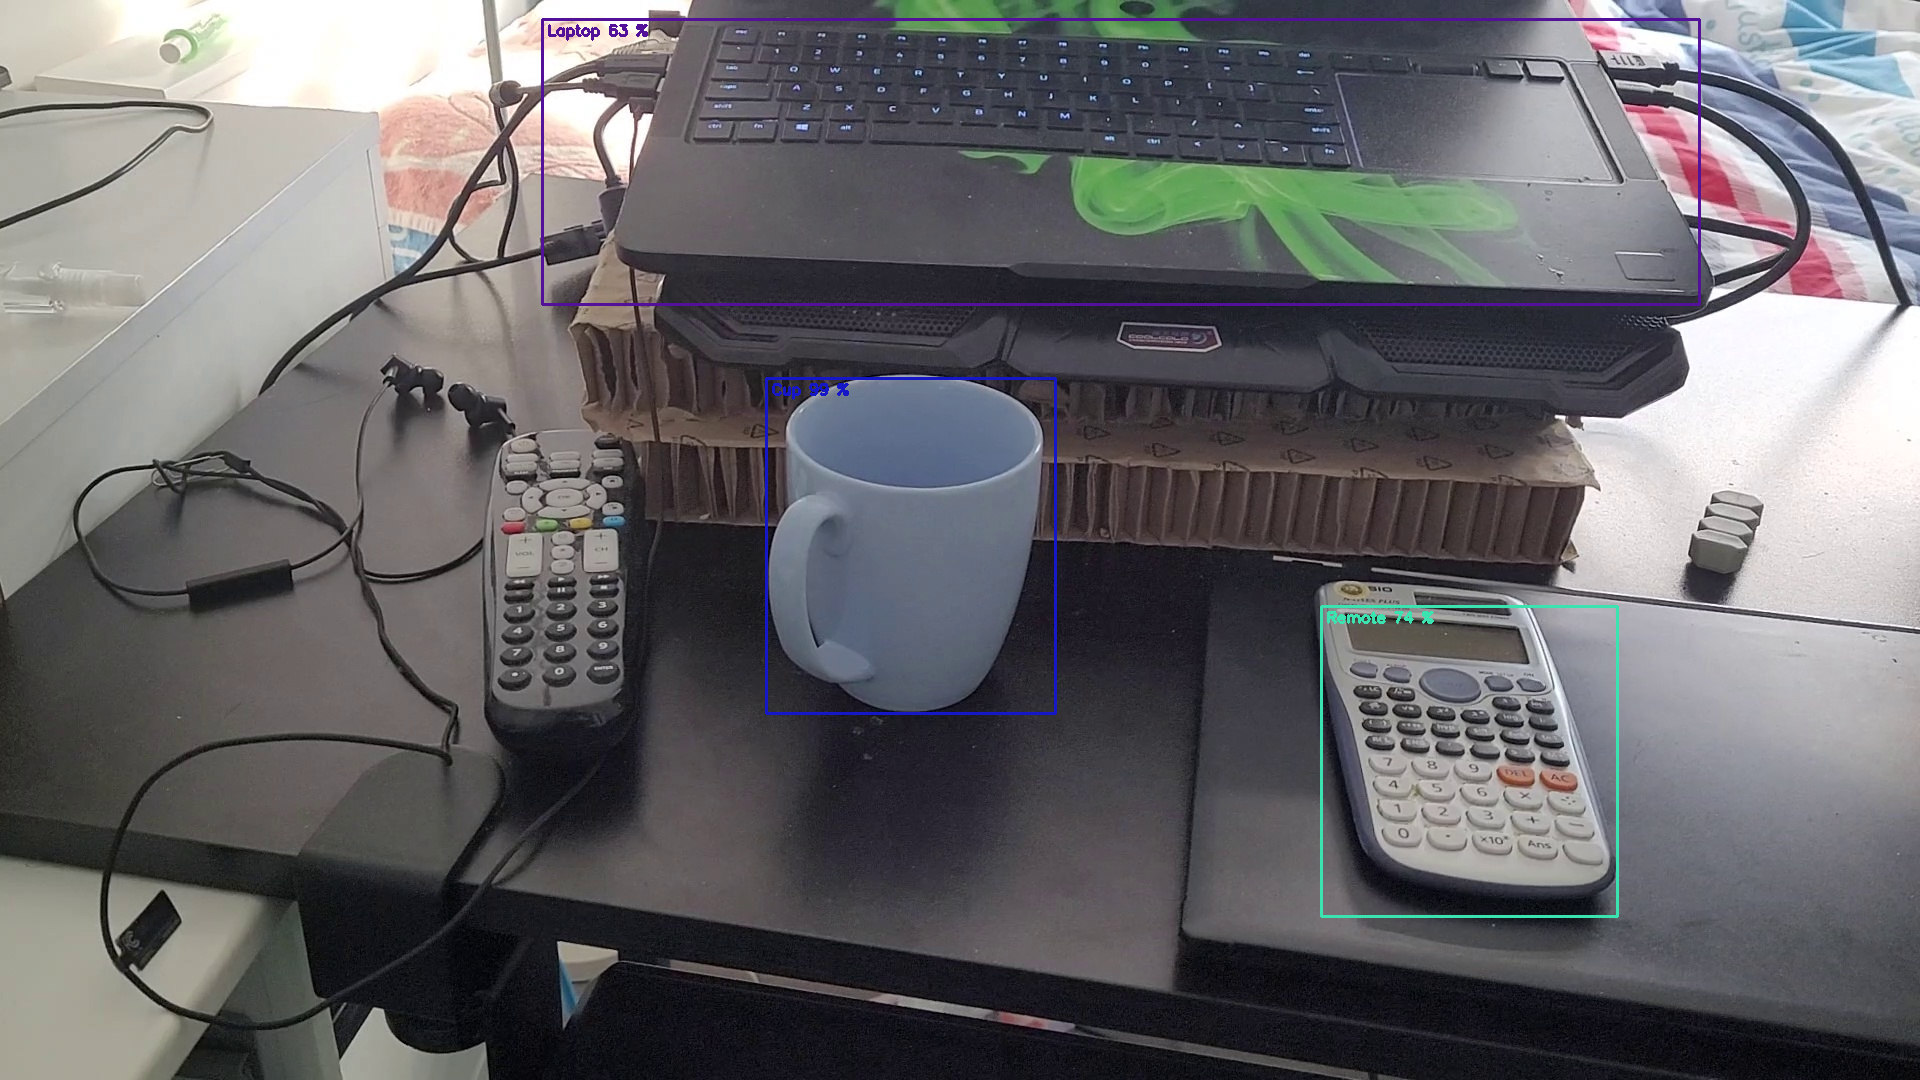

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import glob
import os
widthheight = 320             # used to evaluated the image at that pixel
confidenceThreshold = 0.5     # value that tells you the threshold of how the network sees as that object
nmsThreshold = 0.6            # value is used to decrease the number of bounding boxes displayed
font = cv.FONT_HERSHEY_SIMPLEX# font value for output name
colors = np.random.uniform(0, 255, size = (len(classNames),3)) # option for using different colors for every name

path = "/content/frame242.jpg"
frame = cv.imread(path)  # takes in frame
displayBox(getOutputs(frame))
cv2_imshow(frame)